In [1]:
import pandas as pd
cleaned_data=pd.read_csv("tiny_sample.csv")

In [2]:
cleaned_data.head()

,Unnamed: 0,duration_seconds,miles,fare,tip,tolls,extra_charges,trip_total,payment_type,start_month,...,gps_pings_dropoff_end,region_pickup,region_dropoff,tip_flag,ride_type,flag_overnight,total_no_tip,start_hour,flag_weekend,outlier
0,2368526,1745.0,5.9,10.00,2.0,0.0,2.55,14.55,Mobile,11,...,3761.0,North,Downtown,1,Rideshare,0,12.55,7,0,False
1,517398,660.0,2.0,9.25,4.0,0.0,2.00,15.75,Card,4,...,4444.0,Downtown,Downtown,1,Taxi,0,11.75,21,0,False
2,4737030,1197.0,3.4,10.00,0.0,0.0,2.55,12.55,Mobile,10,...,3393.0,Downtown,South,0,Rideshare,0,12.55,19,0,False
3,2437426,799.0,3.7,7.50,0.0,0.0,2.55,10.05,Mobile,5,...,3897.0,North,Downtown,0,Rideshare,0,10.05,21,0,False
4,10330,780.0,1.4,8.50,2.0,0.0,0.00,10.50,Card,4,...,16663.0,Downtown,Downtown,1,Taxi,0,8.50,18,0,False


### Read from train and test data directly

In [3]:
import pandas as pd
train_data=pd.read_csv("tiny_sample_train.csv")

In [4]:
test_data=pd.read_csv("tiny_sample_test.csv")

In [5]:
#myColumns=["duration_seconds","miles","fare","total_no_tip","speed_pickup_start","bus_count_pickup_start","speed_dropoff_end","bus_count_dropoff_end"]

myColumns=["duration_seconds","total_no_tip","bus_count_pickup_start","bus_count_dropoff_end"]
train_x=train_data[myColumns]
test_x=test_data[myColumns]

In [6]:
train_y=train_data["tip_flag"]
test_y=test_data["tip_flag"]

### Scale the data

In [68]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train_x)
train_x = scaler.transform(train_x)
test_x = scaler.transform(test_x)

### Run CNN

In [69]:
#Select best k
from sklearn.metrics import accuracy_score
for i in range (1,30):
    knn=KNeighborsClassifier(n_neighbors=i)
    modelKnn=knn.fit(train_x, train_y)
    predKnn=knn.predict(test_x)
    w=accuracy_score(predKnn, test_y)
    print ([i,w])

[1, 0.68736]
[2, 0.7689866666666667]
[3, 0.7377466666666667]
[4, 0.77462]
[5, 0.75946]
[6, 0.7795]
[7, 0.7715266666666667]
[8, 0.7828933333333333]
[9, 0.7774133333333333]
[10, 0.78478]
[11, 0.7813133333333333]
[12, 0.7857733333333333]
[13, 0.7835933333333334]
[14, 0.78642]
[15, 0.7848866666666666]
[16, 0.7868666666666667]
[17, 0.786]
[18, 0.7877466666666667]
[19, 0.7867533333333333]
[20, 0.7879733333333333]
[21, 0.7876333333333333]
[22, 0.7886666666666666]
[23, 0.78792]
[24, 0.7886733333333333]
[25, 0.78818]
[26, 0.7886333333333333]
[27, 0.78818]
[28, 0.7886466666666667]
[29, 0.7886466666666667]


Select k=15

In [26]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(train_x, train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [27]:
train_pred=classifier.predict(train_x)

In [37]:
test_pred = classifier.predict(test_x)

In [29]:
#Check confusion matrix for testing dataset
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(test_y, test_pred))
print(classification_report(test_y, test_pred))

[[104482  13799]
 [ 27265   4454]]
              precision    recall  f1-score   support

           0       0.79      0.88      0.84    118281
           1       0.24      0.14      0.18     31719

    accuracy                           0.73    150000
   macro avg       0.52      0.51      0.51    150000
weighted avg       0.68      0.73      0.70    150000



In [38]:
#Check confusion matrix for training dataset
print(confusion_matrix(train_y, train_pred))
print(classification_report(train_y, train_pred))

[[263158  12827]
 [ 44045  29970]]
              precision    recall  f1-score   support

           0       0.86      0.95      0.90    275985
           1       0.70      0.40      0.51     74015

    accuracy                           0.84    350000
   macro avg       0.78      0.68      0.71    350000
weighted avg       0.82      0.84      0.82    350000



### Plot confusion result

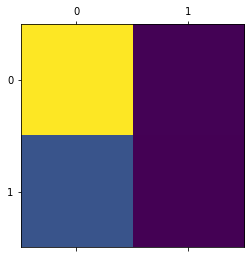

In [21]:
import matplotlib.pylab as pl
pl.matshow(confusion_matrix(test_y, test_pred))

### Save the prediction results

In [30]:
#Save the result
pd.DataFrame(train_pred).to_csv("training_result_KNN.csv")
pd.DataFrame(test_pred).to_csv('testing_result_KNN.csv')

### Let us try to plot the result

In [31]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import datasets, neighbors
from mlxtend.plotting import plot_decision_regions
from sklearn.neighbors import KNeighborsClassifier

In [27]:
from sklearn.model_selection import train_test_split
myColumns=["duration_seconds","total_no_tip"]
selected_data=cleaned_data[myColumns]

x_train, x_test, y_train, y_test = train_test_split(selected_data, cleaned_data.loc[:,"tip_flag"], 
                                                    test_size=0.25)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)



In [33]:
clf = KNeighborsClassifier(n_neighbors=25)
y=y_train.astype(int).values
clf.fit(x_train, y)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=25, p=2,
                     weights='uniform')

In [ ]:
ax=plot_decision_regions(x_train,y, clf=clf, legend=2)
plt.xlabel("total_no_tip")
plt.ylabel("duration_seconds")
plt.title("knn with 25 clusters")
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ["nontip", "tip"], framealpha=0.3, scatterpoints=1)
plt.show()

### Second method

In [32]:
#Below is a function to make 2D KNN plots 

def knn_comparison(data, k, firstColumnName, secondColumnName):
 x = data[[firstColumnName,secondColumnName]].values
 y = data["tip_flag"].astype(int).values
 clf = neighbors.KNeighborsClassifier(n_neighbors=k)
 clf.fit(x, y)
# Plotting decision region
 ax=plot_decision_regions(x, y, clf=clf, legend=2)
# Adding axes annotations
 plt.xlabel(firstColumnName)
 plt.ylabel(secondColumnName)
 plt.title("Knn with K="+ str(k))
 handles, labels = ax.get_legend_handles_labels()
 ax.legend(handles, ["nontip", "tip"], framealpha=0.3, scatterpoints=1)
 plt.show()

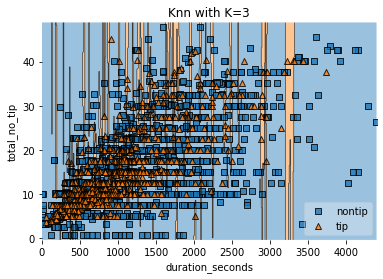

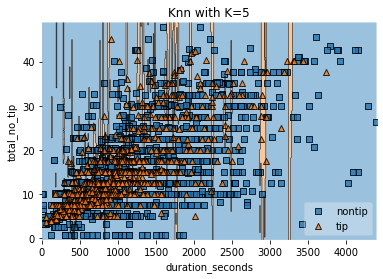

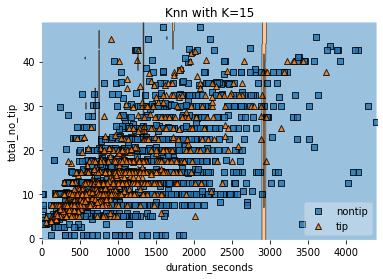

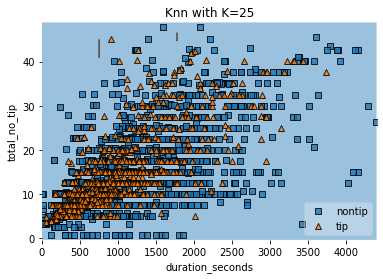

In [100]:
for i in [3,5,15,25]:
    knn_comparison(cleaned_data[:5000], i, "duration_seconds","total_no_tip")

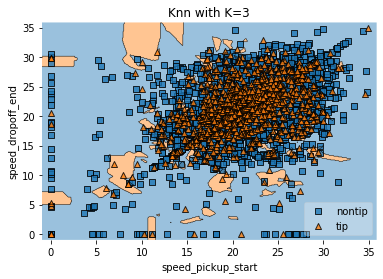

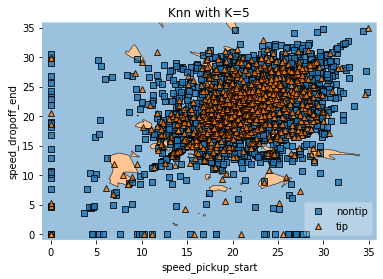

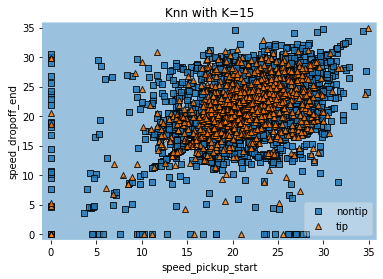

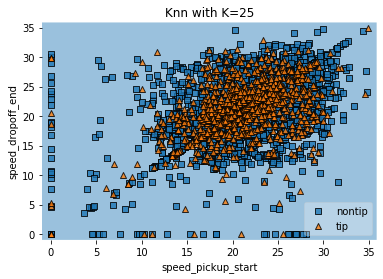

In [98]:
for i in [3,5,15,25]:
    knn_comparison(cleaned_data[:5000], i, "speed_pickup_start","speed_dropoff_end")

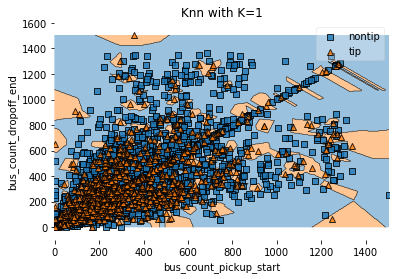

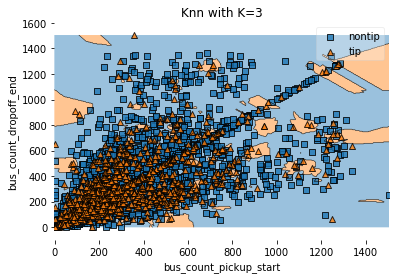

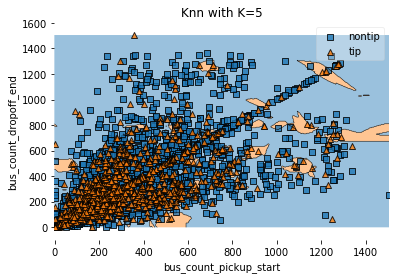

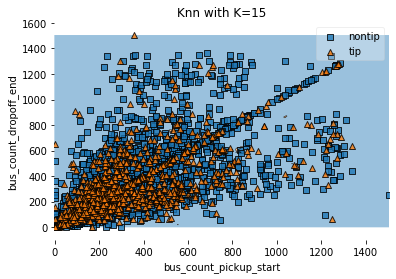

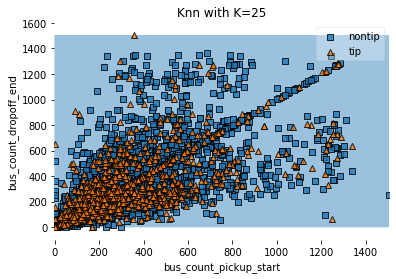

In [35]:
for i in [1,3,5,15,25]:
    knn_comparison(cleaned_data[:5000], i, "bus_count_pickup_start","bus_count_dropoff_end")

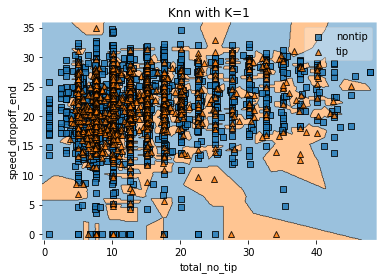

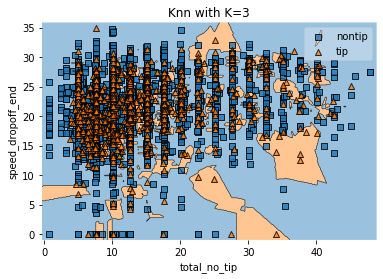

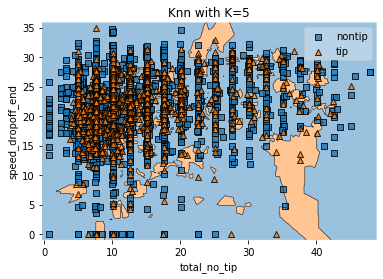

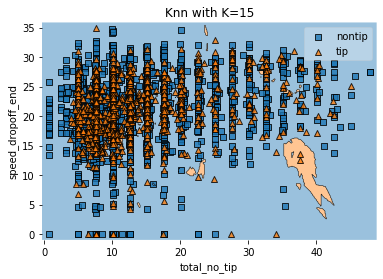

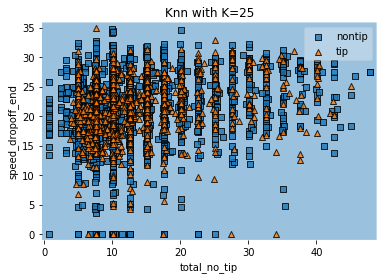

In [36]:
for i in [1,3,5,15,25]:
    knn_comparison(cleaned_data[:5000], i, "total_no_tip","speed_dropoff_end")